# Step 1: Setup and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style for your plots
sns.set_theme(style="whitegrid")

# Load the CLEAN dataset from Notebook 1
# Make sure you have uploaded 'cleaned_flight_data.csv' to the Colab files area
df = pd.read_csv('cleaned_flight_data.csv')

# Convert DATE back to datetime objects (CSV saves them as strings)
df['DATE'] = pd.to_datetime(df['DATE'])

print("Data Loaded Successfully.")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head(3)

Data Loaded Successfully.
Rows: 27273, Columns: 35


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DATE,Total_Delay,Delay_Status,Route,AIRPORT,Origin_City,STATE,COUNTRY,Origin_Lat,Origin_Long
0,2015,1.0,6.0,2.0,DL,1190.0,N960DL,CAK,ATL,1115.0,...,2015-01-06,-3.0,On Time / Early,CAK -> ATL,Akron-Canton Regional Airport,Akron,OH,USA,40.91631,-81.44247
1,2015,1.0,10.0,6.0,WN,3506.0,N748SW,RDU,TPA,1205.0,...,2015-01-10,-15.0,On Time / Early,RDU -> TPA,Raleigh-Durham International Airport,Raleigh,NC,USA,35.87764,-78.78747
2,2015,1.0,16.0,5.0,MQ,3225.0,N838MQ,DCA,JFK,1255.0,...,2015-01-16,3.0,Minor Delay,DCA -> JFK,Ronald Reagan Washington National Airport,Arlington,VA,USA,38.85208,-77.03772


# Block 2: Visualization 1 - Comparison Analysis (Bar Chart)

/tmp/ipython-input-4218322152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=airline_delays, x='ARRIVAL_DELAY', y='AIRLINE', palette='viridis')


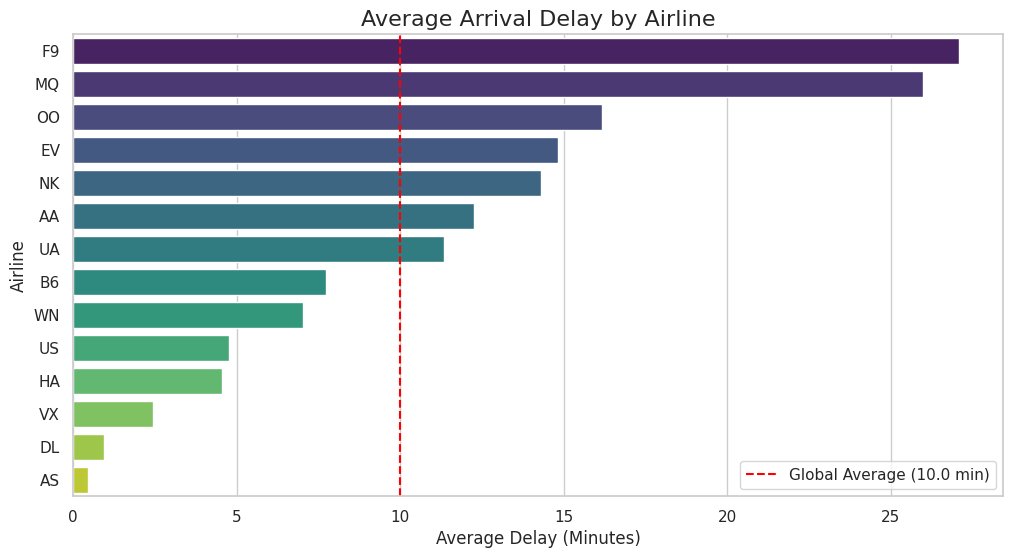

REPORT NOTES (What-Why-How):
- What: Bar chart showing average delay minutes per airline.
- Why: To compare carrier performance and identify the least reliable airlines.
- How: Length of bar encodes delay duration; color hue distinguishes airlines.


In [3]:
# 1. Prepare the data: Calculate average delay by airline
airline_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).reset_index()

# 2. Create the Chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=airline_delays, x='ARRIVAL_DELAY', y='AIRLINE', palette='viridis')

# 3. Add Reference Line (Enhancement requirement [cite: 44])
avg_delay_all = df['ARRIVAL_DELAY'].mean()
plt.axvline(avg_delay_all, color='red', linestyle='--', label=f'Global Average ({avg_delay_all:.1f} min)')

# 4. Labels & Formatting
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Average Delay (Minutes)', fontsize=12)
plt.ylabel('Airline', fontsize=12)
plt.legend()
plt.show()

print("REPORT NOTES (What-Why-How):")
print("- What: Bar chart showing average delay minutes per airline.")
print("- Why: To compare carrier performance and identify the least reliable airlines.")
print("- How: Length of bar encodes delay duration; color hue distinguishes airlines.")

# Block 3: Visualization 2 - Trend Analysis (Line Chart)

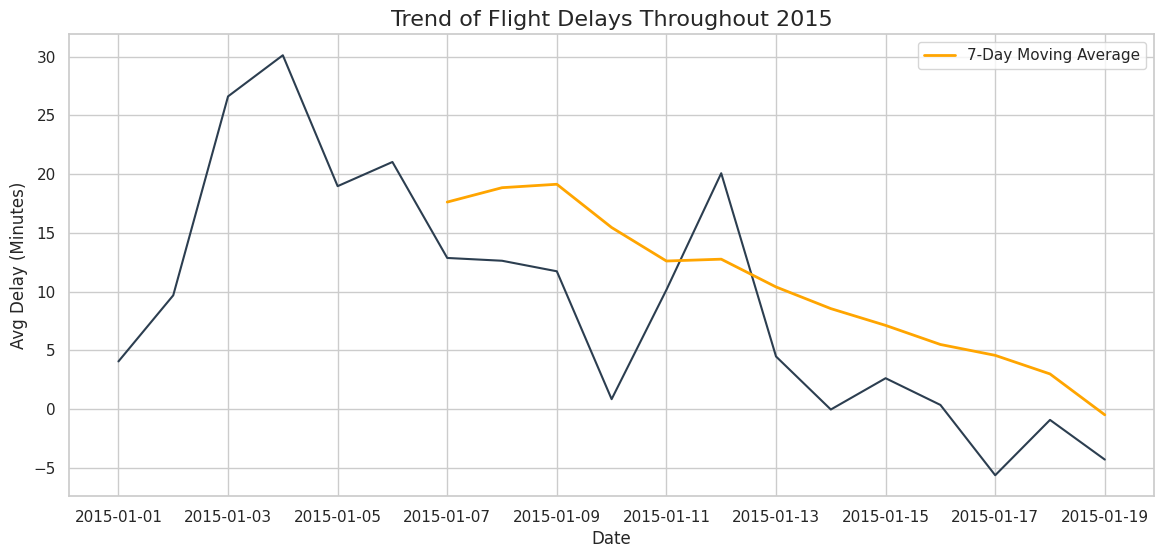

REPORT NOTES:
- What: Line chart showing daily delays vs. a 7-day moving average.
- Why: To identify seasonal patterns (e.g., summer or holiday spikes).
- How: X-axis maps to time; Y-axis maps to delay magnitude.


In [4]:
# 1. Prepare the data: Group by Date
daily_trend = df.groupby('DATE')['ARRIVAL_DELAY'].mean().reset_index()

# 2. Create the Chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trend, x='DATE', y='ARRIVAL_DELAY', color='#2c3e50', linewidth=1.5)

# 3. Add Moving Average (Enhancement for Trend )
# A 7-day rolling average smoothes out daily spikes to show the real trend
daily_trend['7_Day_MA'] = daily_trend['ARRIVAL_DELAY'].rolling(window=7).mean()
sns.lineplot(data=daily_trend, x='DATE', y='7_Day_MA', color='orange', linewidth=2, label='7-Day Moving Average')

# 4. Labels
plt.title('Trend of Flight Delays Throughout 2015', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Avg Delay (Minutes)', fontsize=12)
plt.legend()
plt.show()

print("REPORT NOTES:")
print("- What: Line chart showing daily delays vs. a 7-day moving average.")
print("- Why: To identify seasonal patterns (e.g., summer or holiday spikes).")
print("- How: X-axis maps to time; Y-axis maps to delay magnitude.")

# Block 4: Visualization 3 - Relationship Analysis (Scatter Plot)

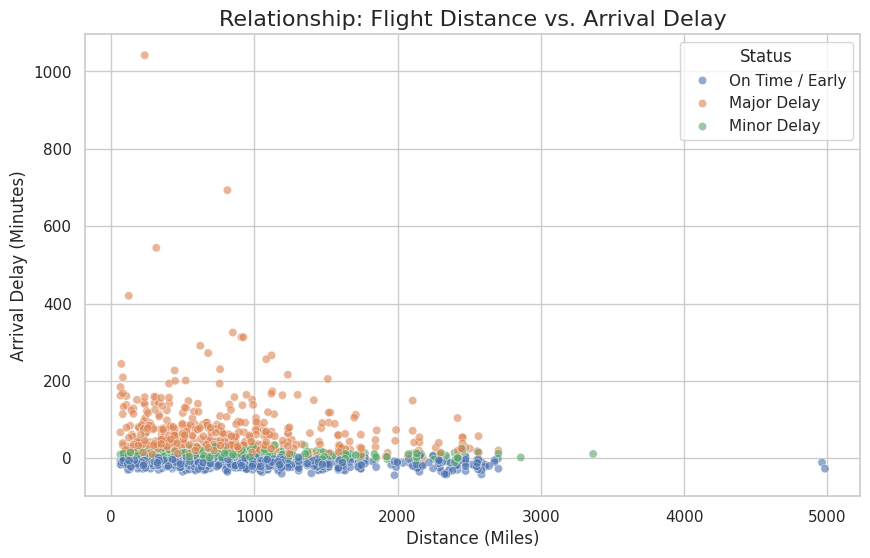

REPORT NOTES:
- What: Scatter plot comparing distance flown to delay time.
- Why: To test if longer flights are more prone to delays.
- How: Position on axes shows values; Color (Hue) shows delay category.


In [5]:
# 1. Create the Chart
plt.figure(figsize=(10, 6))

# We use a sample of 2000 points to keep the scatter plot readable, not a solid blob
sns.scatterplot(
    data=df.sample(2000, random_state=1),
    x='DISTANCE',
    y='ARRIVAL_DELAY',
    hue='Delay_Status', # Colors points by status (On Time vs Delayed)
    alpha=0.6 # Transparency
)

# 2. Labels
plt.title('Relationship: Flight Distance vs. Arrival Delay', fontsize=16)
plt.xlabel('Distance (Miles)', fontsize=12)
plt.ylabel('Arrival Delay (Minutes)', fontsize=12)
plt.legend(title='Status')
plt.show()

print("REPORT NOTES:")
print("- What: Scatter plot comparing distance flown to delay time.")
print("- Why: To test if longer flights are more prone to delays.")
print("- How: Position on axes shows values; Color (Hue) shows delay category.")

# Block 5: Visualization 4 - Distribution (Box Plot or Histogram)

/tmp/ipython-input-924996936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AIRLINE', y='DEPARTURE_DELAY', palette='coolwarm')


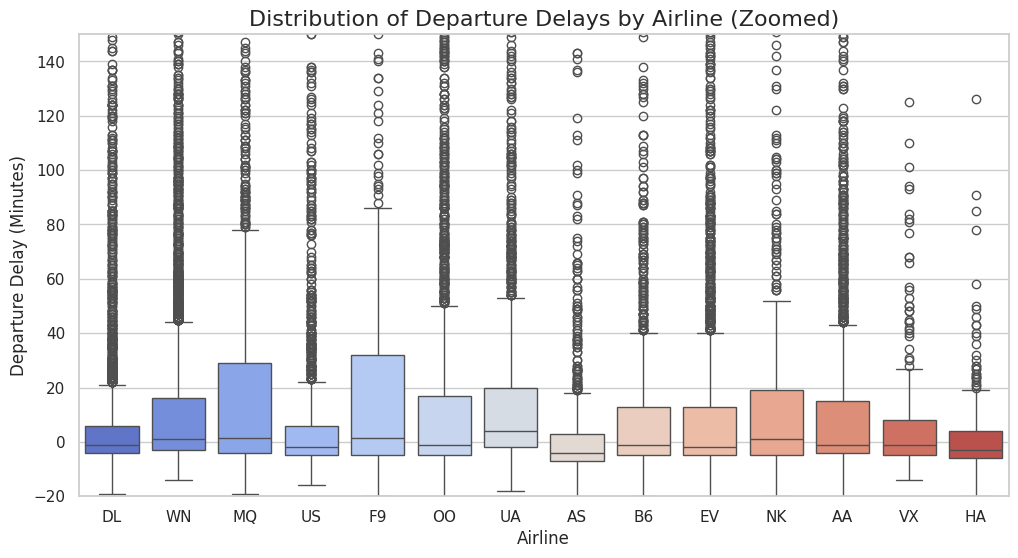

REPORT NOTES:
- What: Box plot showing the median and spread of delays per airline.
- Why: To see which airlines are consistent vs. which have extreme outliers.
- How: Box height shows the Interquartile Range (IQR); dots show outliers.


In [6]:
# 1. Create the Chart
plt.figure(figsize=(12, 6))

# Boxplot is excellent for showing distribution + outliers
sns.boxplot(data=df, x='AIRLINE', y='DEPARTURE_DELAY', palette='coolwarm')

# 2. Zoom in (Optional but recommended)
# Delays can go up to 1000 mins, which squashes the chart. Let's limit Y-axis to see the "normal" range.
plt.ylim(-20, 150)

# 3. Labels
plt.title('Distribution of Departure Delays by Airline (Zoomed)', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Departure Delay (Minutes)', fontsize=12)
plt.show()

print("REPORT NOTES:")
print("- What: Box plot showing the median and spread of delays per airline.")
print("- Why: To see which airlines are consistent vs. which have extreme outliers.")
print("- How: Box height shows the Interquartile Range (IQR); dots show outliers.")